In [2]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Load into DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Preview the data
df.head()


Saving cleaned_solar_energy_consumption.csv to cleaned_solar_energy_consumption (3).csv


,Entity,Code,Year,Electricity_from_solar___TWh
0,ASEAN (Ember),NaN,2000,0.0
1,ASEAN (Ember),NaN,2001,0.0
2,ASEAN (Ember),NaN,2002,0.0
3,ASEAN (Ember),NaN,2003,0.0
4,ASEAN (Ember),NaN,2004,0.0


In [3]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

# Rename for convenience
df.rename(columns={'Electricity_from_solar___TWh': 'Solar_TWh'}, inplace=True)

# Check nulls and data types
print("Null values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Summary stats
df.describe()


Null values:
 Entity          0
Code         1592
Year            0
Solar_TWh       0
dtype: int64

Data types:
 Entity        object
Code          object
Year           int64
Solar_TWh    float64
dtype: object


,Year,Solar_TWh
count,8415.000000,8415.000000
mean,2004.392751,9.810721
std,14.048419,73.175539
min,1965.000000,0.000000
25%,1997.000000,0.000000
50%,2007.000000,0.000000
75%,2015.000000,0.040000
max,2024.000000,2130.640000


In [4]:
# Unique countries/regions
print("Number of unique countries/entities:", df['Entity'].nunique())
print("Data range:", df['Year'].min(), "to", df['Year'].max())

# Check sample countries
df['Entity'].value_counts().head(10)


Number of unique countries/entities: 253
Data range: 1965 to 2024


,count
Entity,
Spain,60
Portugal,60
Malaysia,60
United Kingdom,60
Switzerland,60
Sweden,60
Sri Lanka,60
Netherlands,60
New Zealand,60


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


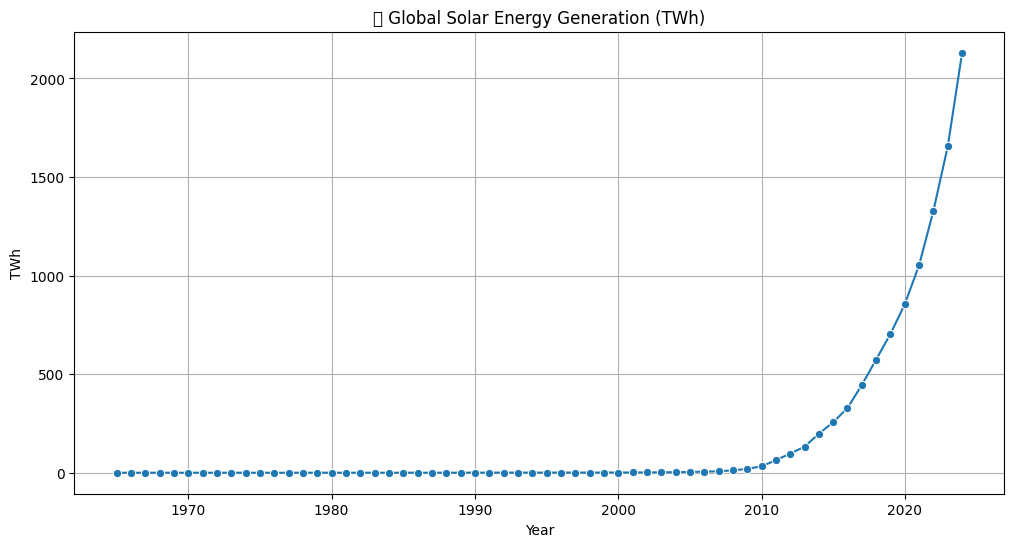

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter global data
global_df = df[df['Entity'] == 'World']

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=global_df, x='Year', y='Solar_TWh', marker='o')
plt.title('🌍 Global Solar Energy Generation (TWh)')
plt.xlabel('Year')
plt.ylabel('TWh')
plt.grid(True)
plt.show()


<ipython-input-6-30c933c11b74>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, y='Entity', x='Solar_TWh', palette='viridis')


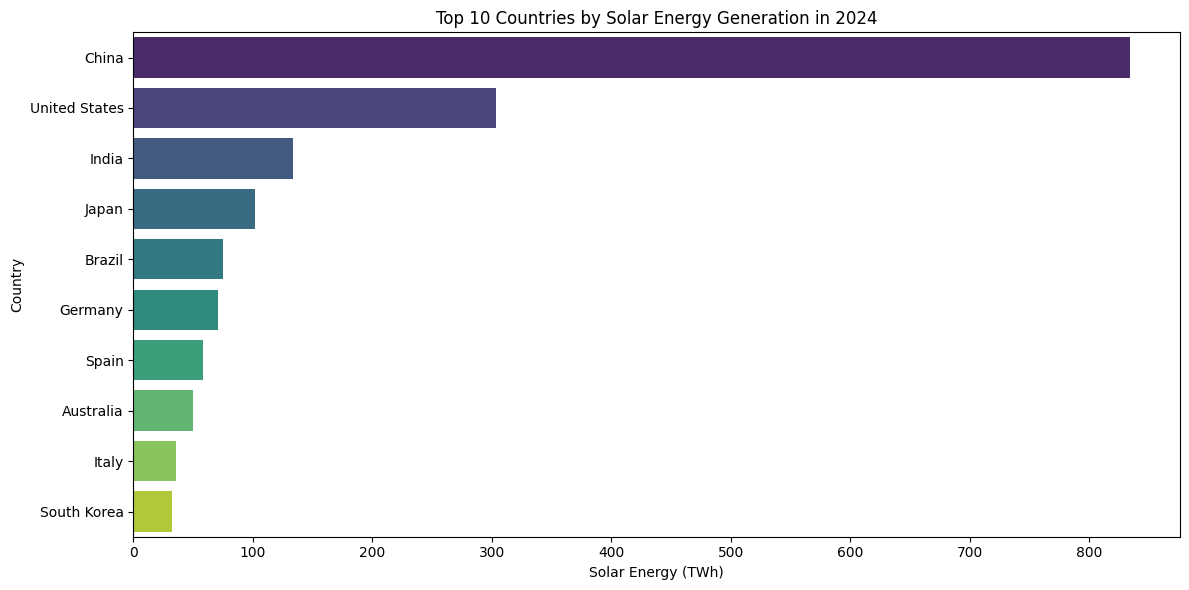

In [6]:
# Get latest year
latest_year = df['Year'].max()

# Filter top 10 countries (excluding 'World' and regional aggregates)
top_countries = (
    df[(df['Year'] == latest_year) & (~df['Entity'].str.contains("World|Europe|Asia|Africa|OECD|Ember"))]
    .sort_values('Solar_TWh', ascending=False)
    .head(10)
)

# Barplot
plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, y='Entity', x='Solar_TWh', palette='viridis')
plt.title(f'Top 10 Countries by Solar Energy Generation in {latest_year}')
plt.xlabel('Solar Energy (TWh)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


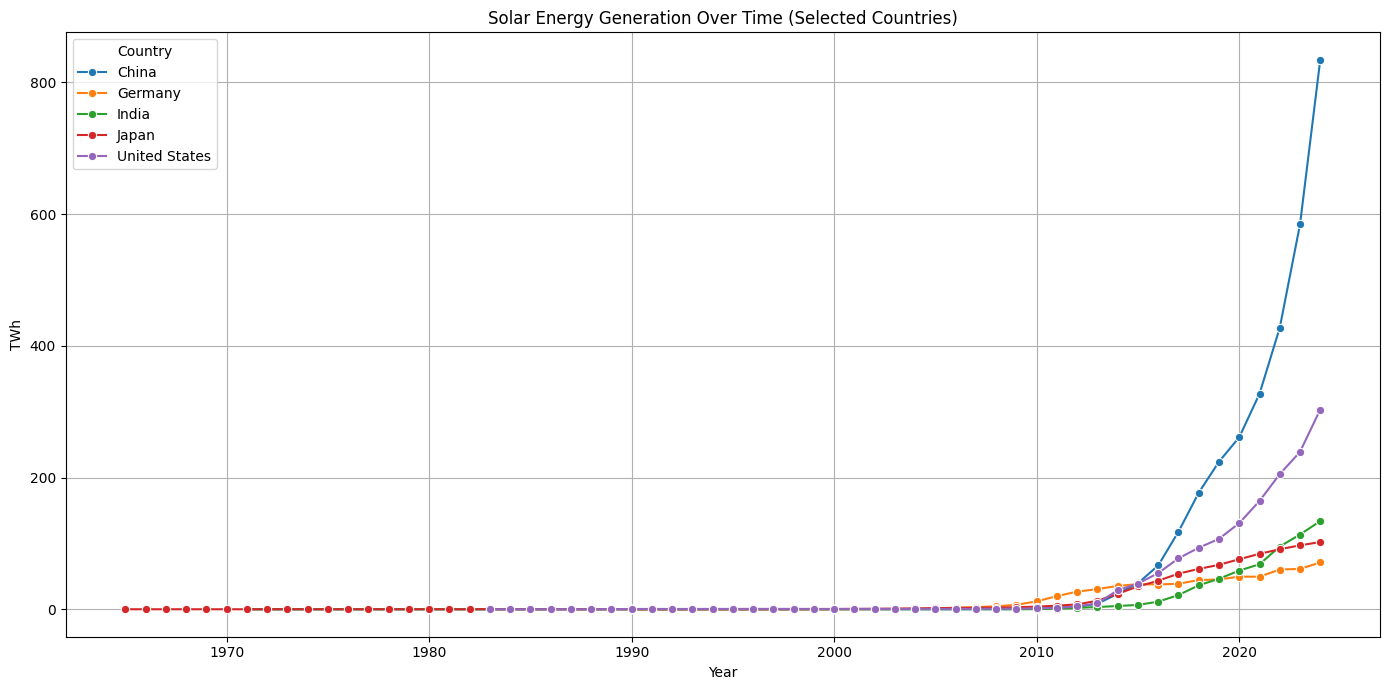

In [7]:
# Choose countries of interest
countries = ['India', 'China', 'United States', 'Germany', 'Japan']

# Filter data
multi_country = df[df['Entity'].isin(countries)]

# Plot
plt.figure(figsize=(14,7))
sns.lineplot(data=multi_country, x='Year', y='Solar_TWh', hue='Entity', marker='o')
plt.title('Solar Energy Generation Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('TWh')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


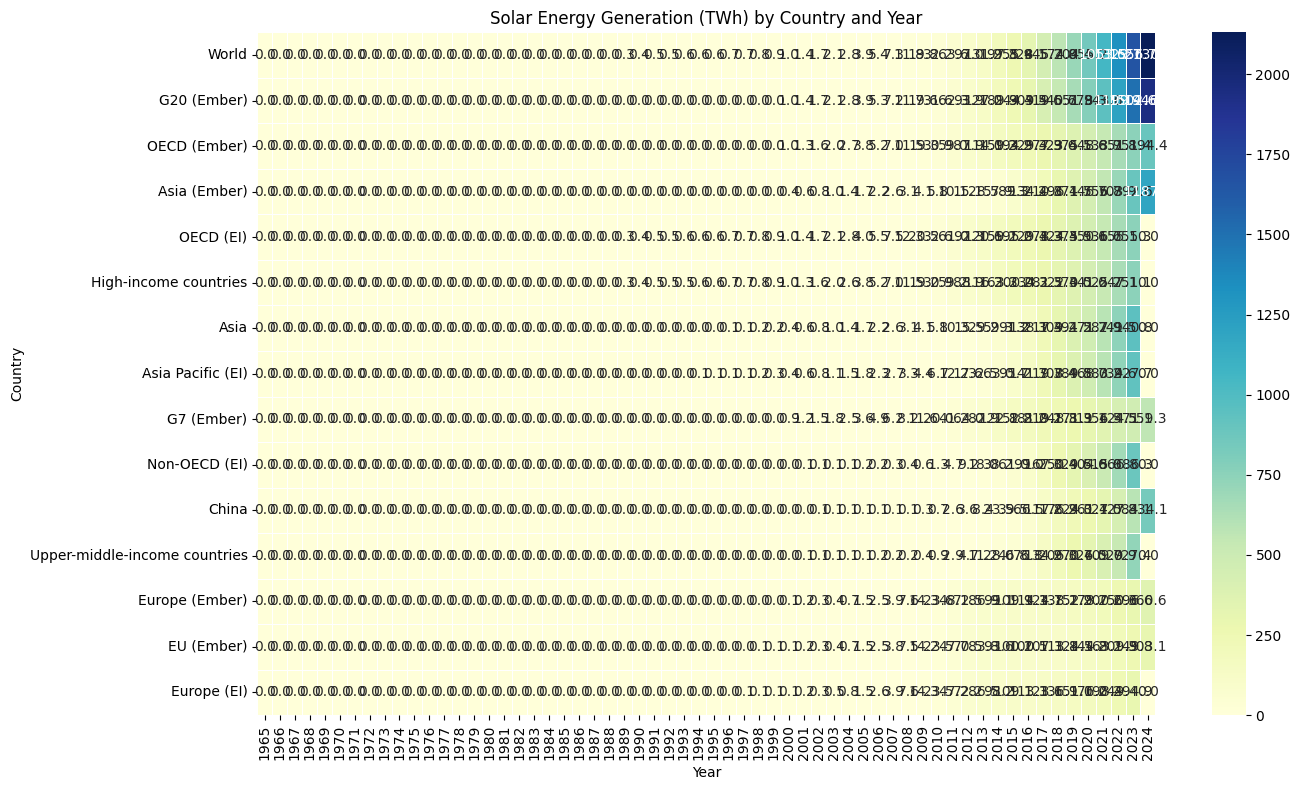

In [8]:
# Pivot the data
pivot_df = df.pivot_table(index='Entity', columns='Year', values='Solar_TWh', aggfunc='sum').fillna(0)

# Filter top 15 generating countries overall
top15_entities = pivot_df.sum(axis=1).sort_values(ascending=False).head(15).index
pivot_top = pivot_df.loc[top15_entities]

# Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(pivot_top, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Solar Energy Generation (TWh) by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


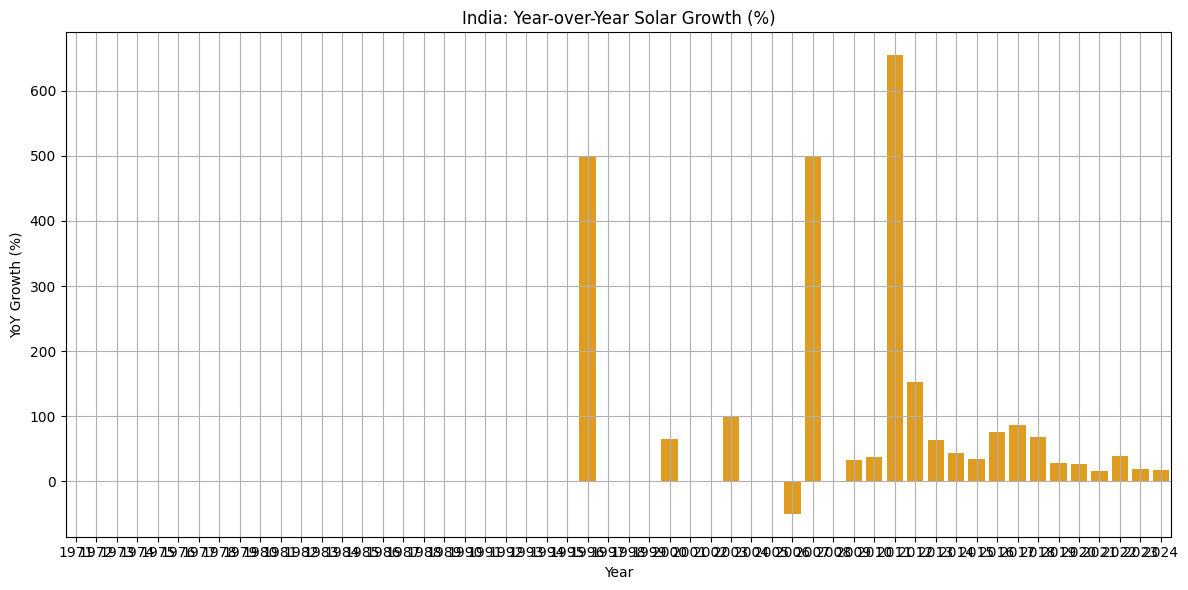

In [9]:
# Country-specific analysis (e.g., India)
country = 'India'
country_df = df[df['Entity'] == country].sort_values('Year')
country_df['YoY_%_Growth'] = country_df['Solar_TWh'].pct_change() * 100

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=country_df, x='Year', y='YoY_%_Growth', color='orange')
plt.title(f'{country}: Year-over-Year Solar Growth (%)')
plt.ylabel('YoY Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Exclude entries that are income groups or global/regional aggregates
excluded_keywords = ["World", "Asia", "Europe", "Africa", "OECD", "Ember", "Union",
                     "America", "Pacific", "income", "countries"]

filtered_df = df[~df['Entity'].str.contains('|'.join(excluded_keywords))]

# Group by Entity and calculate total solar generation
top5_countries_only = (
    filtered_df.groupby('Entity')['Solar_TWh']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Display top 5 countries
print("Top 5 countries by total solar generation (2010–2023):")
print(top5_countries_only)

top5_countries_only



Top 5 countries by total solar generation (2010–2023):
Entity
China            3098.134000
United States    1470.352570
Japan             779.935574
Germany           639.220000
India             603.345253
Name: Solar_TWh, dtype: float64


,Solar_TWh
Entity,
China,3098.134000
United States,1470.352570
Japan,779.935574
Germany,639.220000
India,603.345253


<ipython-input-11-3d0c55218b92>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_countries_only.values, y=top5_countries_only.index, palette='crest')


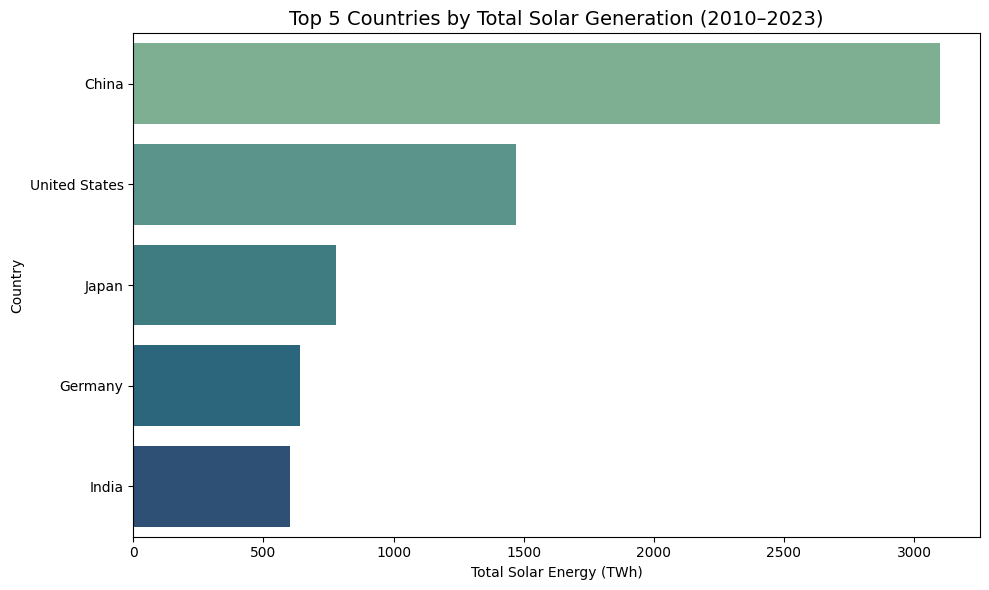

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_countries_only.values, y=top5_countries_only.index, palette='crest')
plt.title('Top 5 Countries by Total Solar Generation (2010–2023)', fontsize=14)
plt.xlabel('Total Solar Energy (TWh)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Assume df is already cleaned and contains:
# Columns: Entity, Year, Solar_TWh
# Also assume top5_countries_only is already computed

# --------------------------
# KPI 1: Solar Growth Momentum Index (SGMI %)
# --------------------------
def compute_sgmi(df, country):
    country_df = df[df['Entity'] == country].sort_values('Year')
    total_all_years = country_df['Solar_TWh'].sum()
    last_3_years = country_df[country_df['Year'] >= country_df['Year'].max() - 2]['Solar_TWh'].sum()
    return round((last_3_years / total_all_years) * 100, 2)

sgmi_scores = {country: compute_sgmi(df, country) for country in top5_countries_only.index}
print("🌟 Solar Growth Momentum Index (SGMI %):")
print(sgmi_scores)

# --------------------------
# KPI 2: Average Annual Growth Rate (AAGR %)
# --------------------------
def compute_aagr(df, country):
    cdf = df[df['Entity'] == country].sort_values('Year')
    cdf = cdf[cdf['Solar_TWh'] > 0]  # avoid division by zero
    cdf['YoY'] = cdf['Solar_TWh'].pct_change()
    return round(cdf['YoY'].mean() * 100, 2)

aagr_scores = {country: compute_aagr(df, country) for country in top5_countries_only.index}
print("\n📈 Average Annual Growth Rate (AAGR %):")
print(aagr_scores)

# --------------------------
# KPI 3: Generation Acceleration Ratio (GAR)
# --------------------------
def compute_gar(df, country):
    cdf = df[df['Entity'] == country].sort_values('Year')
    cdf = cdf[cdf['Solar_TWh'] > 0]
    cdf['YoY'] = cdf['Solar_TWh'].pct_change()

    if len(cdf) < 3:
        return None

    last_growth = cdf['YoY'].iloc[-1]
    past_avg_growth = cdf['YoY'].iloc[1:-1].mean()

    if past_avg_growth == 0 or pd.isna(last_growth):
        return None

    return round(last_growth / past_avg_growth, 2)

gar_scores = {country: compute_gar(df, country) for country in top5_countries_only.index}
print("\n⚡ Generation Acceleration Ratio (GAR):")
print(gar_scores)

# --------------------------
# OPTIONAL: Combine All KPIs in a DataFrame
# --------------------------
kpi_df = pd.DataFrame({
    'SGMI (%)': sgmi_scores,
    'AAGR (%)': aagr_scores,
    'GAR': gar_scores
})

kpi_df = kpi_df.round(2)
print("\n📊 Combined KPI Table:")
print(kpi_df)


🌟 Solar Growth Momentum Index (SGMI %):
{'China': 59.57, 'United States': 50.82, 'Japan': 37.19, 'Germany': 30.12, 'India': 56.75}

📈 Average Annual Growth Rate (AAGR %):
{'China': 53.23, 'United States': 92.67, 'Japan': 61.11, 'Germany': 50.28, 'India': 86.61}

⚡ Generation Acceleration Ratio (GAR):
{'China': 0.8, 'United States': 0.29, 'Japan': 0.08, 'Germany': 0.31, 'India': 0.2}

📊 Combined KPI Table:
               SGMI (%)  AAGR (%)   GAR
China             59.57     53.23  0.80
United States     50.82     92.67  0.29
Japan             37.19     61.11  0.08
Germany           30.12     50.28  0.31
India             56.75     86.61  0.20


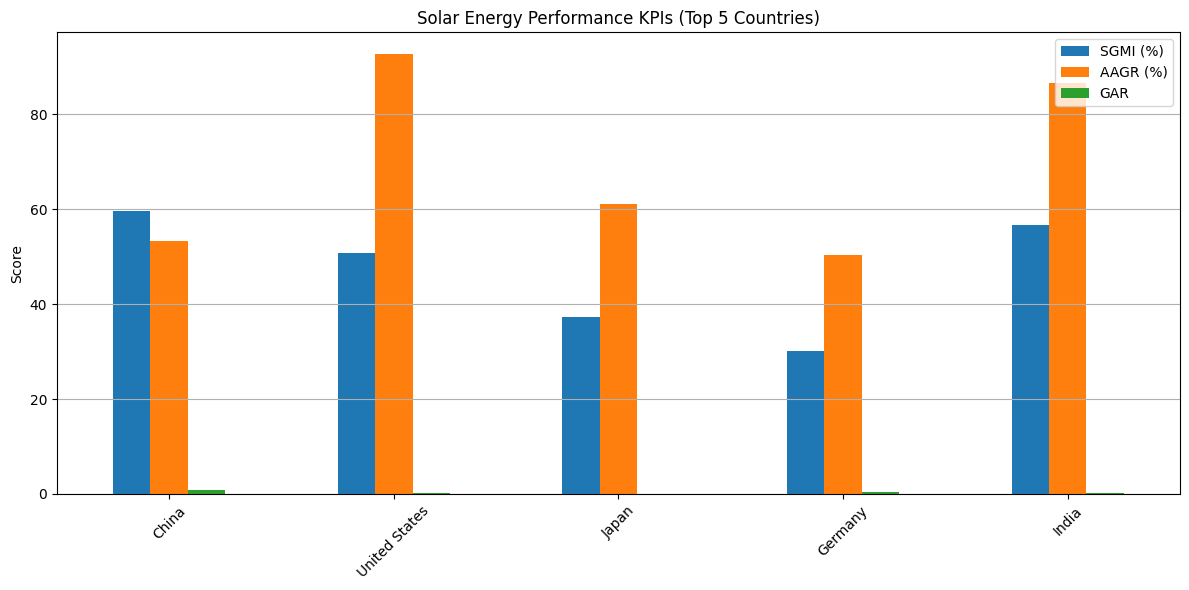

In [13]:
kpi_df.plot(kind='bar', figsize=(12,6))
plt.title("Solar Energy Performance KPIs (Top 5 Countries)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<ipython-input-14-32438bb01f4e>:29: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


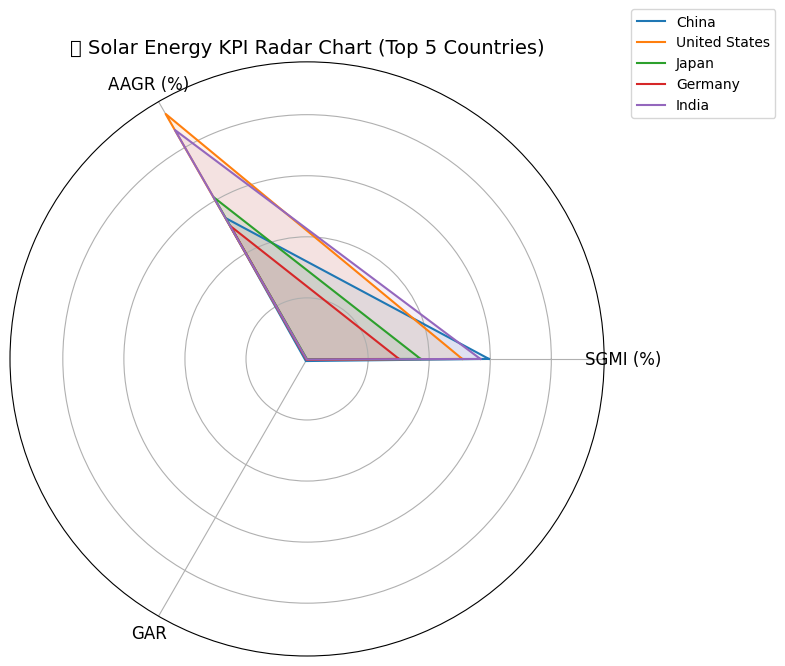

In [14]:
import numpy as np

# ---- RADAR CHART FUNCTION ----
def plot_radar_chart(dataframe):
    # KPI categories and number of axes
    categories = list(dataframe.columns)
    num_vars = len(categories)

    # Calculate angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Initialize the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each country's KPIs
    for index, row in dataframe.iterrows():
        values = row.tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=index)
        ax.fill(angles, values, alpha=0.1)

    # Configure labels and appearance
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels([])  # Hide radial labels
    ax.set_title("🌍 Solar Energy KPI Radar Chart (Top 5 Countries)", size=14)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# ---- CALL THE FUNCTION ----
plot_radar_chart(kpi_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb8omphb/_jeo38r2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb8omphb/cc_ggbp_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75672', 'data', 'file=/tmp/tmphb8omphb/_jeo38r2.json', 'init=/tmp/tmphb8omphb/cc_ggbp_.json', 'output', 'file=/tmp/tmphb8omphb/prophet_modelvr8ye_a2/prophet_model-20250521235647.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:56:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:56:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

  0%|          | 0/51 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater 

  0%|          | 0/39 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb8omphb/a7yxcuso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb8omphb/vp5j5zgy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92697', 'data', 'file=/tmp/tmphb8omphb/a7yxcuso.json', 'init=/tmp/tmphb8omphb/vp5j5zgy.json', 'output', 'file=/tmp/tmphb8omphb/prophet_modelkq2oso5c/prophet_model-20250521235700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:57:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:57:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb8omphb/yzr3_i46.json
DEBUG:cmdstanpy:input tempfile

  0%|          | 0/57 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater 

  0%|          | 0/32 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb8omphb/o6b7xf6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb8omphb/f5qyugz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51241', 'data', 'file=/tmp/tmphb8omphb/o6b7xf6f.json', 'init=/tmp/tmphb8omphb/f5qyugz0.json', 'output', 'file=/tmp/tmphb8omphb/prophet_modelnkmsnqkk/prophet_model-20250521235736.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:57:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

  0%|          | 0/51 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater 

📊 RMSE Comparison Table:
               RMSE (TWh)
China               68.71
United States       23.97
Japan               15.01
Germany              7.99
India               14.59


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


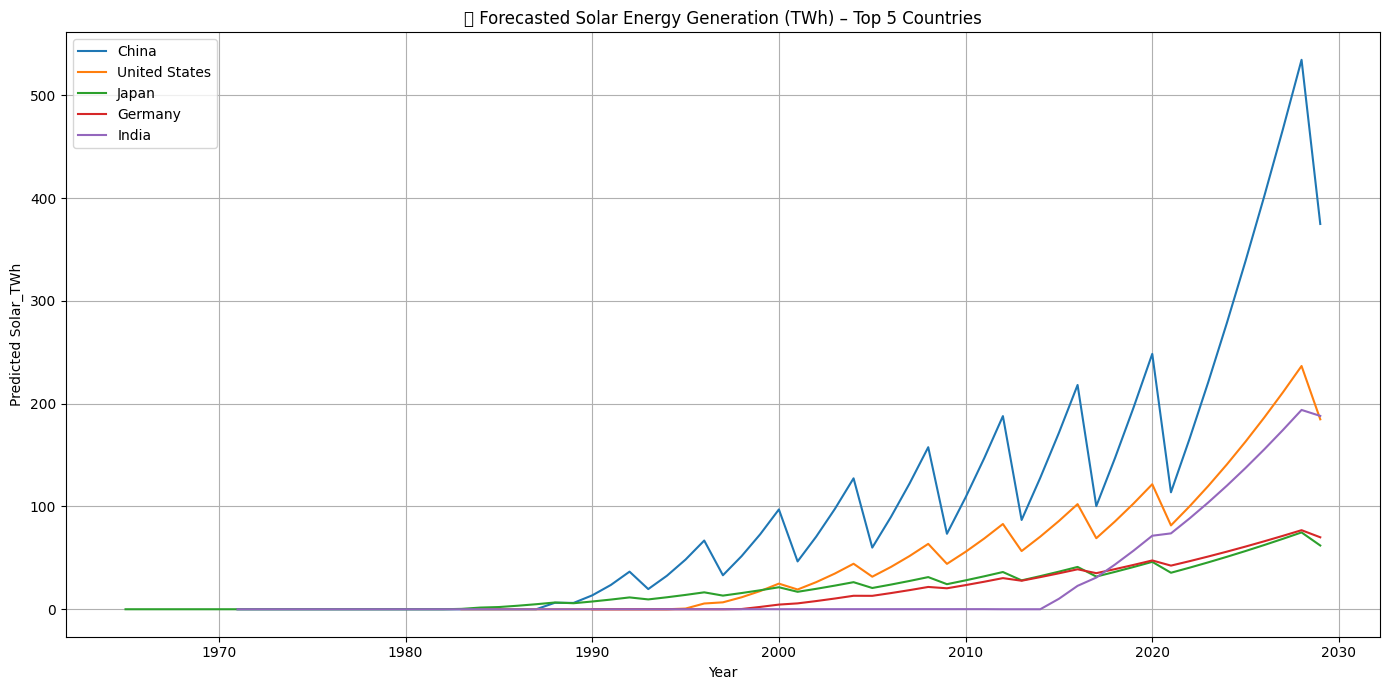

<ipython-input-15-94087a98f890>:87: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


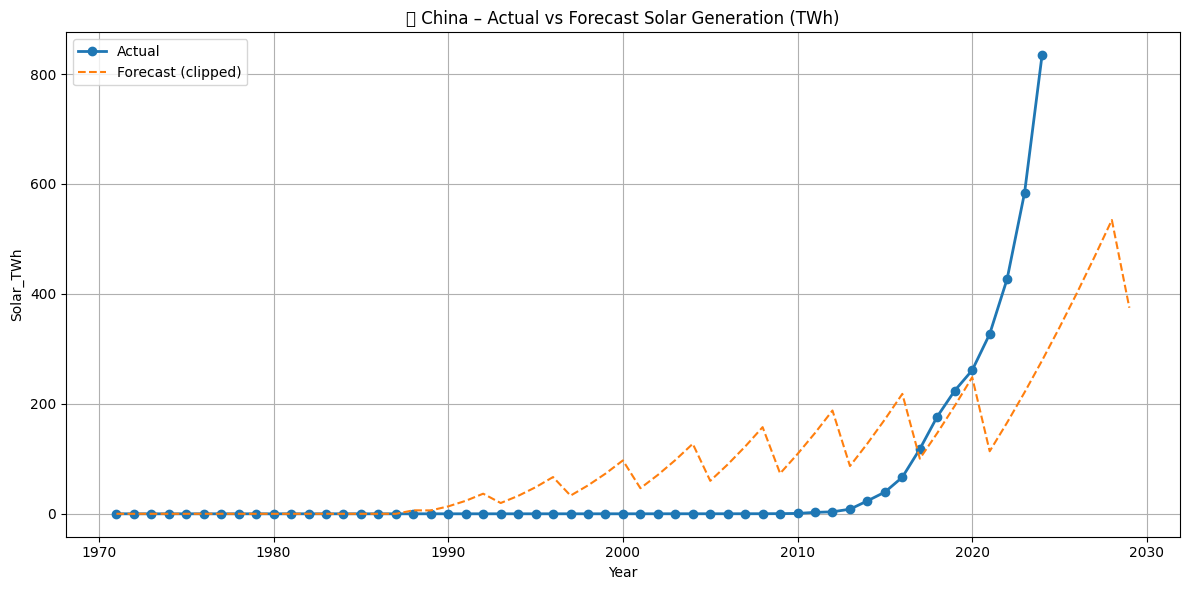

<ipython-input-15-94087a98f890>:87: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


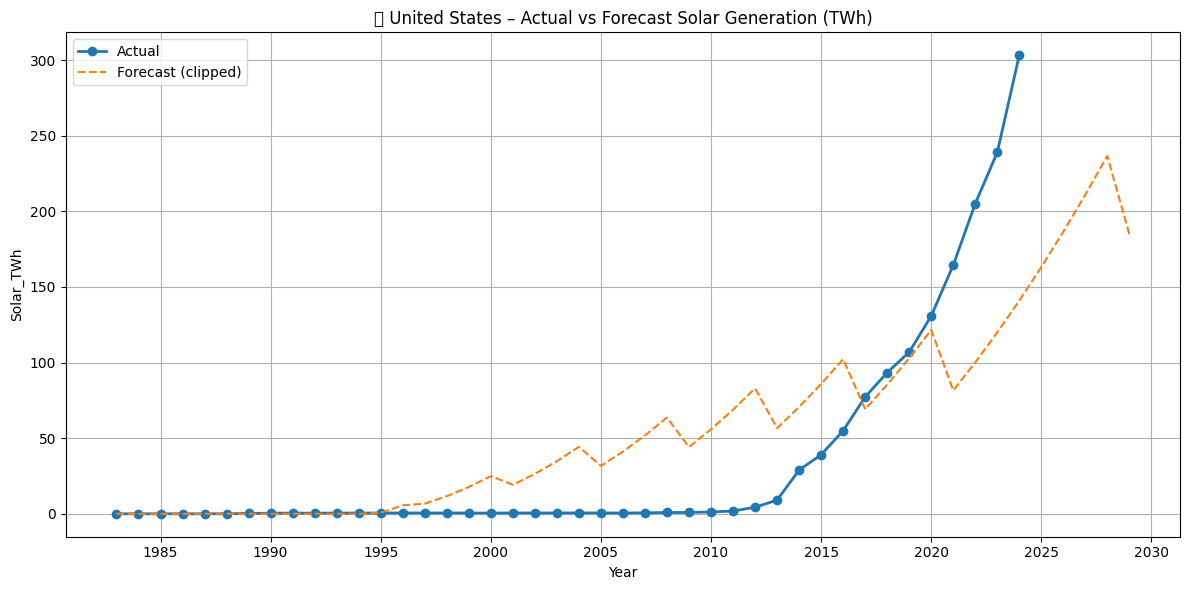

<ipython-input-15-94087a98f890>:87: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


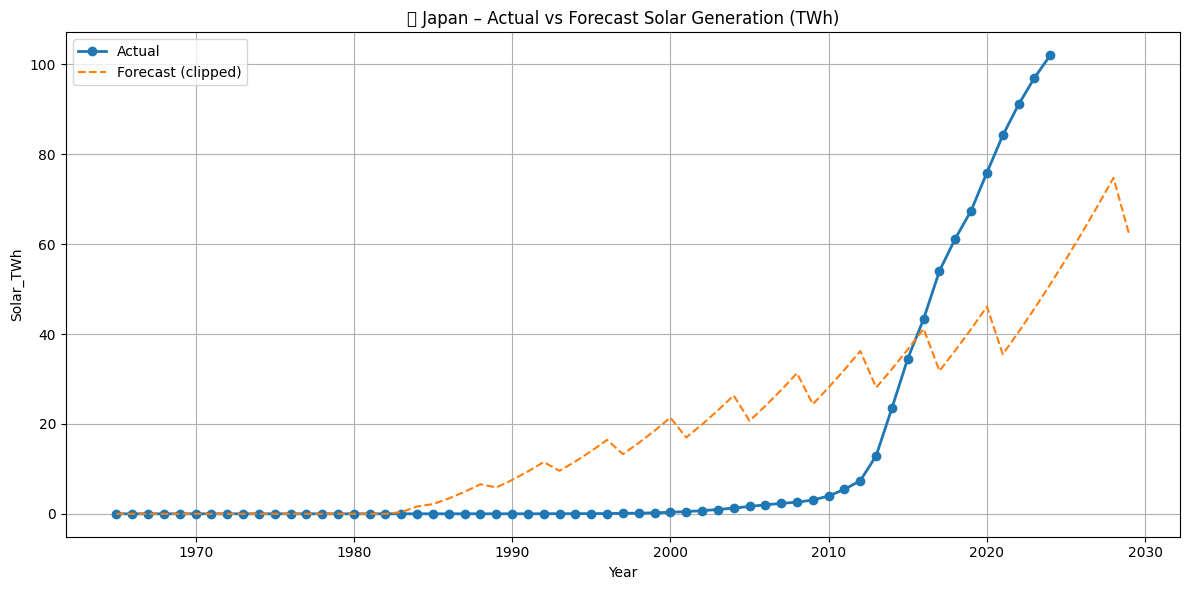

<ipython-input-15-94087a98f890>:87: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


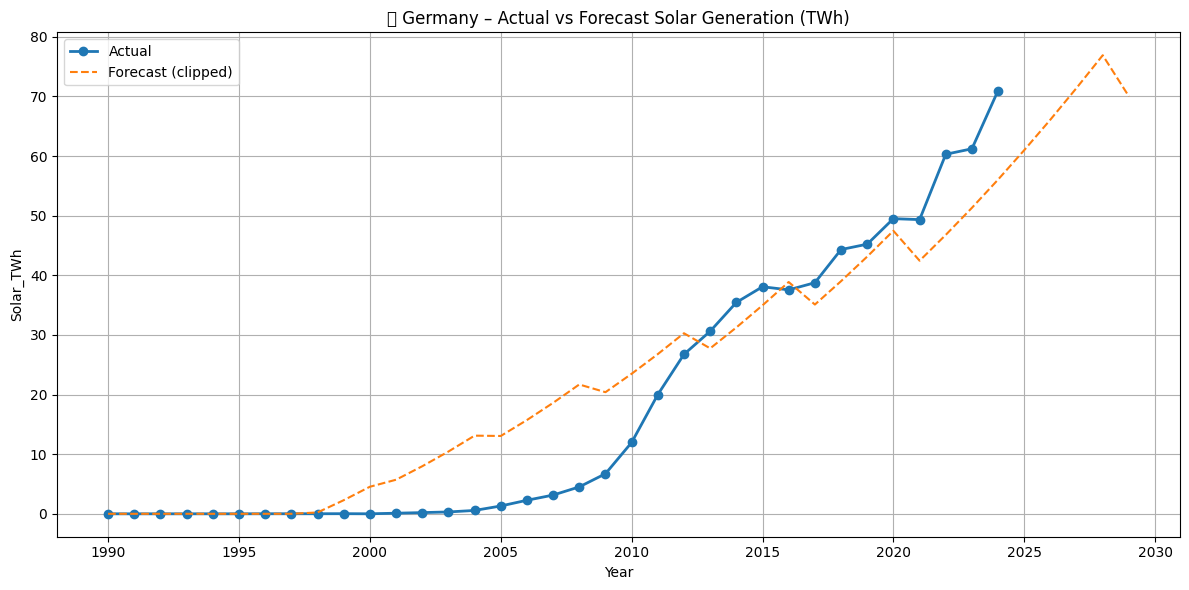

<ipython-input-15-94087a98f890>:87: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


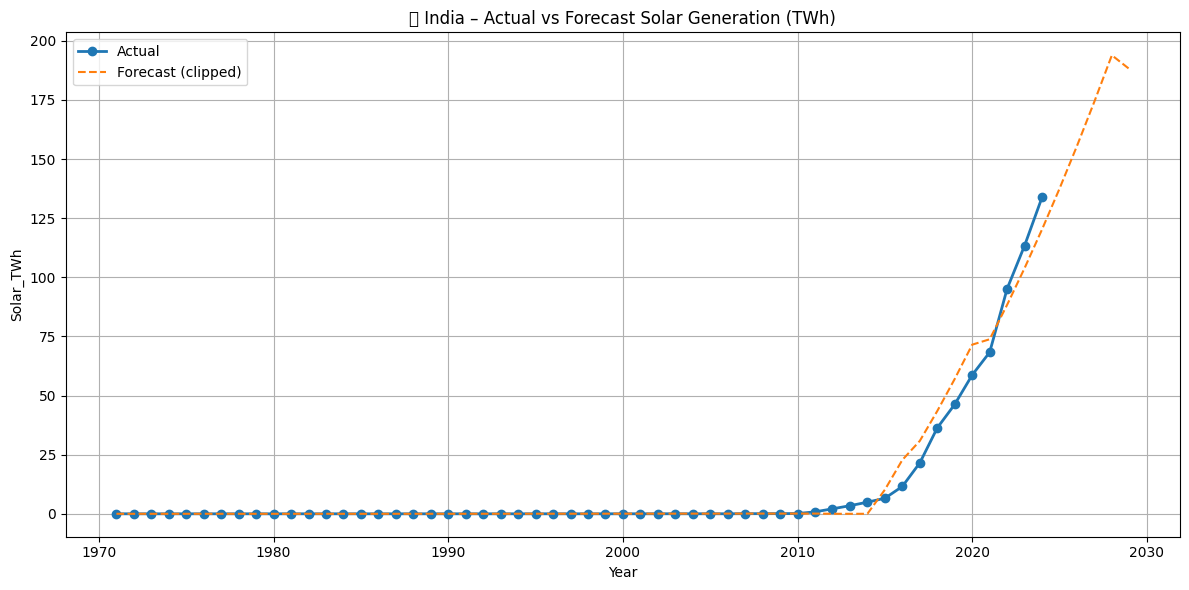

In [15]:
# STEP 1: Install Prophet
!pip install prophet

# STEP 2: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# STEP 3: Top countries
top5_countries = ['China', 'United States', 'Japan', 'Germany', 'India']
rmse_results = {}
combined_forecast = pd.DataFrame()

# STEP 4: Forecasting function with clipping logic
def forecast_and_store(df, country, periods=5):
    global combined_forecast

    # Prepare data
    country_df = df[df['Entity'] == country][['Year', 'Solar_TWh']].dropna()
    country_df = country_df.rename(columns={'Year': 'ds', 'Solar_TWh': 'y'})
    country_df['ds'] = pd.to_datetime(country_df['ds'], format='%Y')

    # Fit Prophet model
    model = Prophet(
        yearly_seasonality=True,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05
    )
    model.fit(country_df)

    # Forecast
    future = model.make_future_dataframe(periods=periods, freq='Y')
    forecast = model.predict(future)

    # 🔧 Clip negative predictions to zero
    forecast['yhat'] = forecast['yhat'].clip(lower=0)

    # Store forecast
    forecast_copy = forecast[['ds', 'yhat']]
    forecast_copy['Country'] = country
    combined_forecast = pd.concat([combined_forecast, forecast_copy])

    # Cross-validation for RMSE
    df_cv = cross_validation(model, initial='730 days', period='365 days', horizon='365 days')
    df_p = performance_metrics(df_cv)
    rmse_results[country] = round(df_p['rmse'].mean(), 2) if 'rmse' in df_p.columns else None

# STEP 5: Run for each country
for country in top5_countries:
    forecast_and_store(df, country, periods=5)

# STEP 6: RMSE Table
rmse_df = pd.DataFrame.from_dict(rmse_results, orient='index', columns=['RMSE (TWh)'])
print("📊 RMSE Comparison Table:")
print(rmse_df)

# STEP 7: Combined Forecast Trend Plot
plt.figure(figsize=(14, 7))
for country in top5_countries:
    subset = combined_forecast[combined_forecast['Country'] == country]
    plt.plot(subset['ds'], subset['yhat'], label=country)

plt.title('📈 Forecasted Solar Energy Generation (TWh) – Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Predicted Solar_TWh')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# STEP 8: Actual vs Forecast Plot Function
def plot_actual_vs_forecast(df, forecast_df, country):
    actual = df[df['Entity'] == country][['Year', 'Solar_TWh']].dropna()
    actual['Year'] = pd.to_datetime(actual['Year'], format='%Y')
    predicted = forecast_df[forecast_df['Country'] == country][['ds', 'yhat']]

    plt.figure(figsize=(12, 6))
    plt.plot(actual['Year'], actual['Solar_TWh'], label='Actual', marker='o', linewidth=2)
    plt.plot(predicted['ds'], predicted['yhat'], label='Forecast (clipped)', linestyle='--')
    plt.title(f'📊 {country} – Actual vs Forecast Solar Generation (TWh)')
    plt.xlabel('Year')
    plt.ylabel('Solar_TWh')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# STEP 9: Run validation plots
for country in top5_countries:
    plot_actual_vs_forecast(df, combined_forecast, country)


In [16]:
!pip install pmdarima


In [17]:
df = pd.read_csv("solar-energy-consumption.csv")
print(df.columns)

Index(['Entity', 'Code', 'Year', 'Electricity from solar - TWh'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


📊 ARIMA RMSE Comparison Table:
               ARIMA RMSE (TWh)
China                    181.53
United States             22.48
Japan                      4.21
Germany                   15.94
India                     27.72


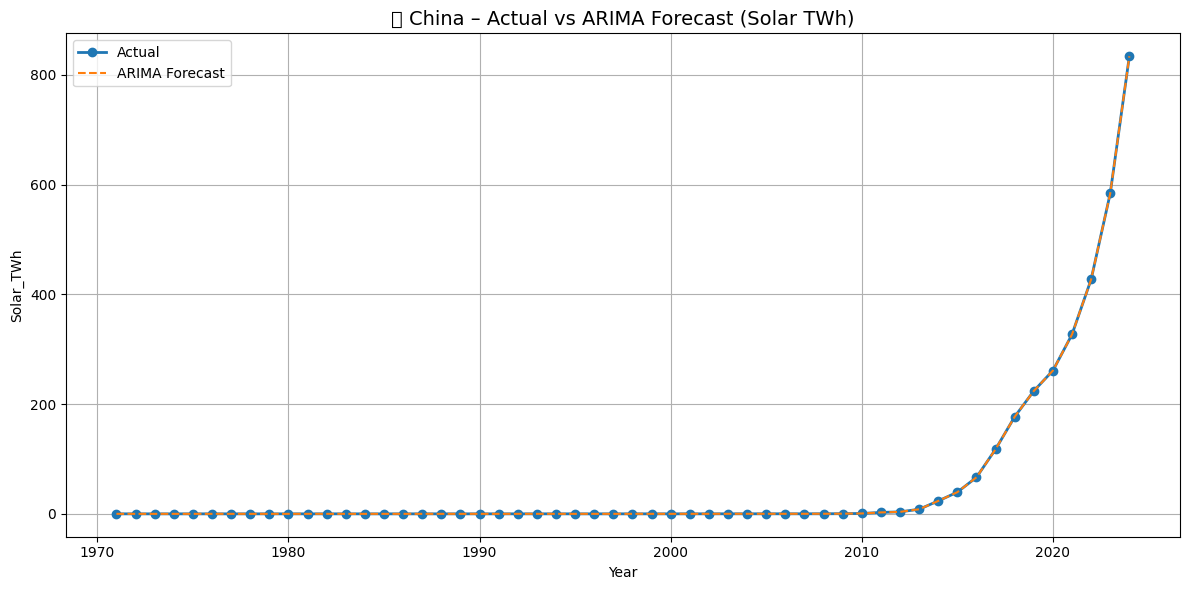

<ipython-input-18-f6433b12102b>:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


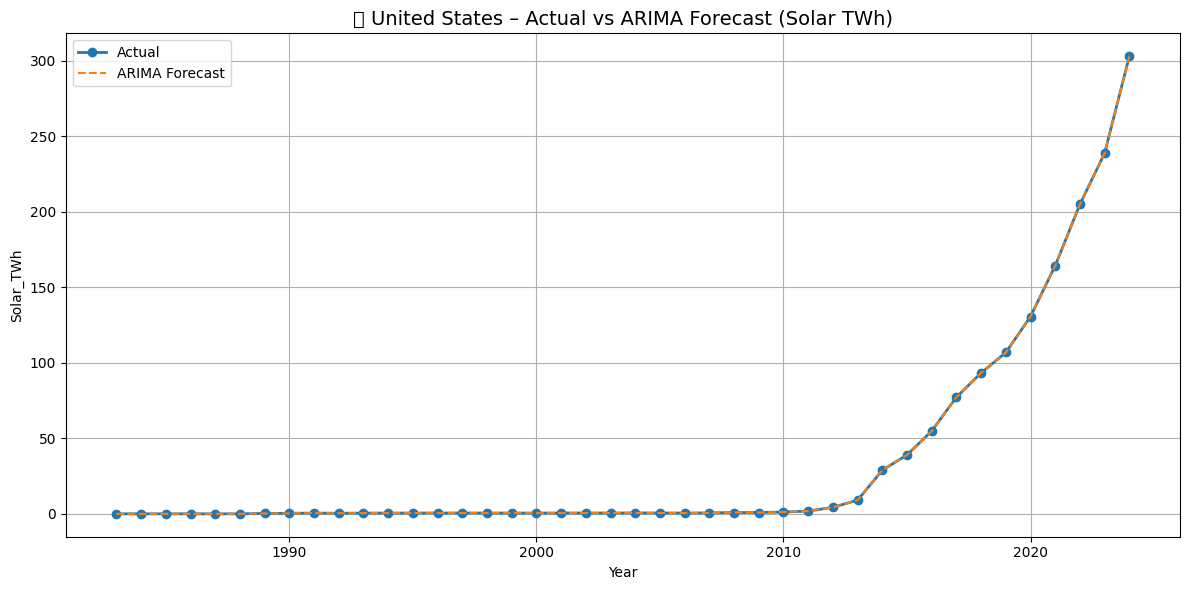

<ipython-input-18-f6433b12102b>:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


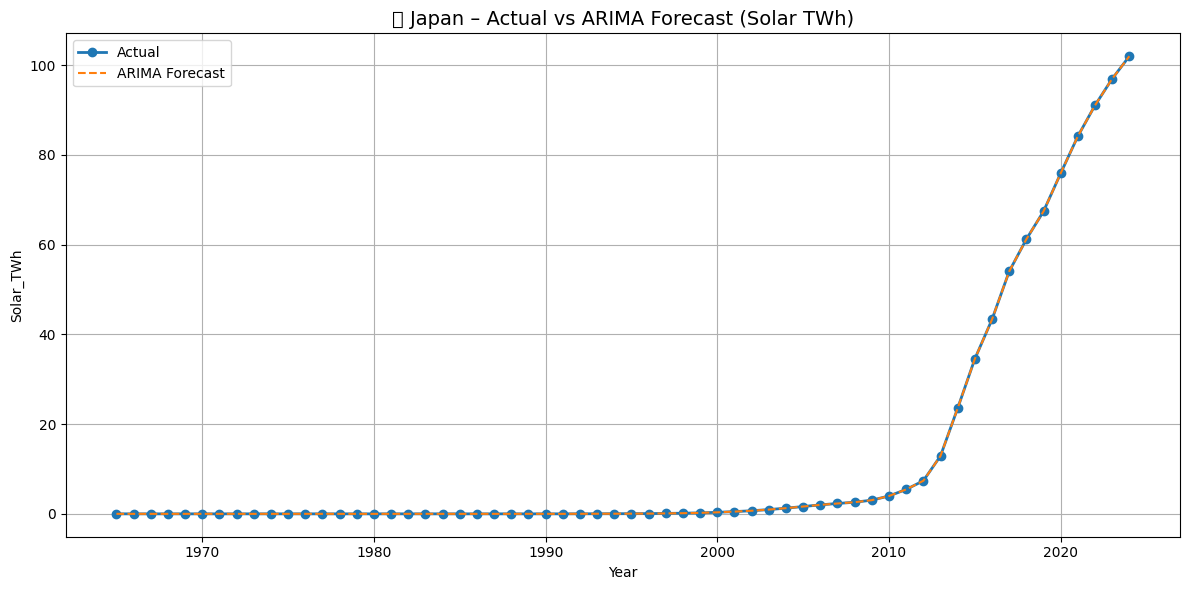

<ipython-input-18-f6433b12102b>:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


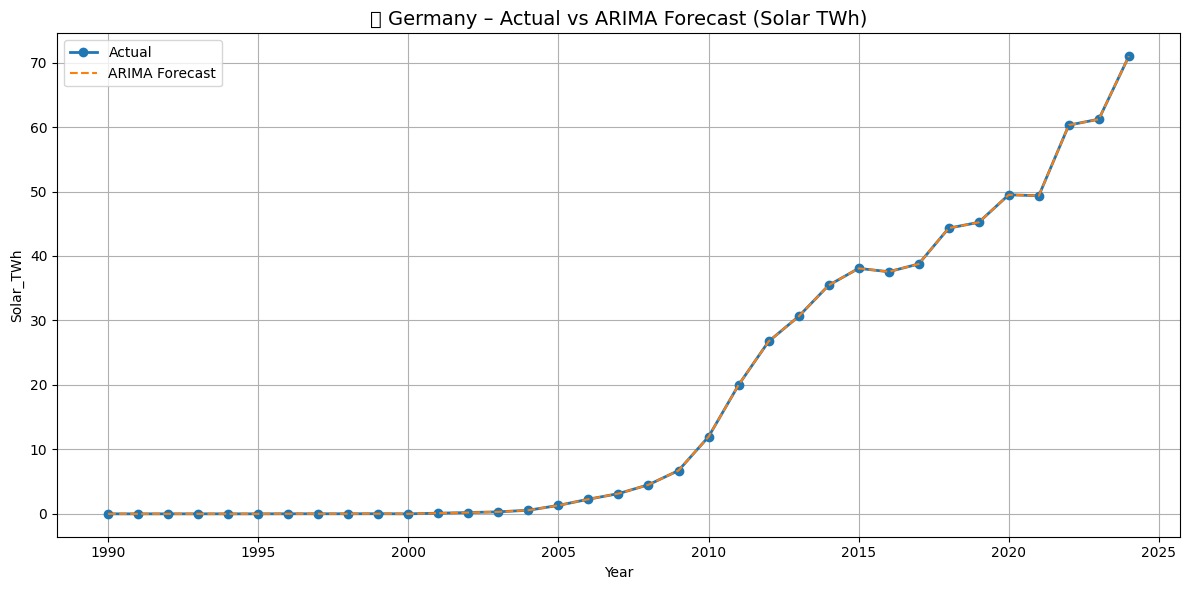

<ipython-input-18-f6433b12102b>:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


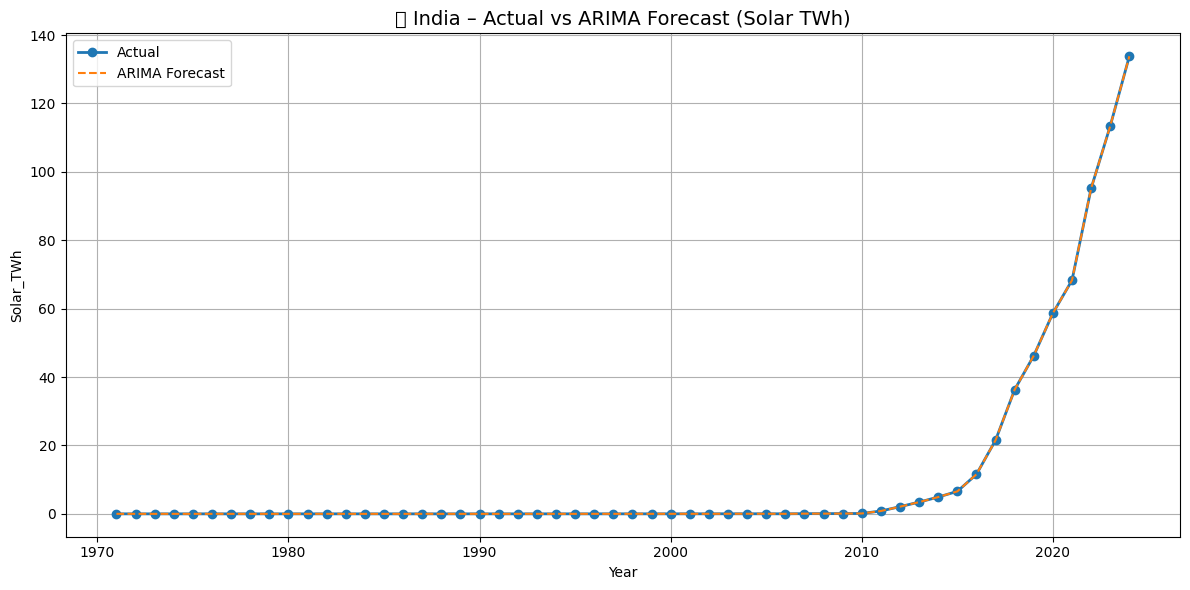

In [18]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pmdarima as pm

# STEP 1: Load dataset and rename column correctly
df = pd.read_csv("solar-energy-consumption.csv")

# Rename the solar column for easier access
df.rename(columns={'Electricity from solar - TWh': 'Solar_TWh'}, inplace=True)

# STEP 2: Define countries and containers
top5_countries = ['China', 'United States', 'Japan', 'Germany', 'India']
arima_rmse_results = {}
arima_combined_forecast = pd.DataFrame()

# STEP 3: Forecasting Function
def forecast_with_arima(df, country, periods=5):
    global arima_combined_forecast

    # Filter country data
    country_df = df[df['Entity'] == country][['Year', 'Solar_TWh']].dropna()
    ts = country_df.set_index('Year')['Solar_TWh']

    # Fit Auto ARIMA model
    model = pm.auto_arima(ts, seasonal=False, suppress_warnings=True, stepwise=True)
    forecast_values = model.predict(n_periods=periods)
    forecast_index = list(range(ts.index.max() + 1, ts.index.max() + periods + 1))
    forecast_series = pd.Series(forecast_values, index=forecast_index)

    # Combine actual + forecast
    full_series = pd.concat([ts, forecast_series])
    full_df = full_series.reset_index()
    full_df.columns = ['Year', 'Solar_TWh']
    full_df['Country'] = country
    arima_combined_forecast = pd.concat([arima_combined_forecast, full_df])

    # RMSE using last 3 years
    if len(ts) >= 6:
        train = ts[:-3]
        test = ts[-3:]
        model_cv = pm.auto_arima(train, seasonal=False, suppress_warnings=True)
        preds = model_cv.predict(n_periods=3)
        rmse = round(sqrt(mean_squared_error(test, preds)), 2)
        arima_rmse_results[country] = rmse
    else:
        arima_rmse_results[country] = None

# STEP 4: Run forecasts
for country in top5_countries:
    forecast_with_arima(df, country, periods=5)

# STEP 5: RMSE Summary Table
arima_rmse_df = pd.DataFrame.from_dict(arima_rmse_results, orient='index', columns=['ARIMA RMSE (TWh)'])
print("\n📊 ARIMA RMSE Comparison Table:")
print(arima_rmse_df)

# STEP 6: Plotting Function
def plot_arima_actual_vs_forecast(df, forecast_df, country):
    actual = df[df['Entity'] == country][['Year', 'Solar_TWh']].dropna()
    predicted = forecast_df[forecast_df['Country'] == country]

    plt.figure(figsize=(12, 6))
    plt.plot(actual['Year'], actual['Solar_TWh'], label='Actual', marker='o', linewidth=2)
    plt.plot(predicted['Year'], predicted['Solar_TWh'], label='ARIMA Forecast', linestyle='--')
    plt.title(f'📊 {country} – Actual vs ARIMA Forecast (Solar TWh)', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Solar_TWh')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# STEP 7: Generate plots
for country in top5_countries:
    plot_arima_actual_vs_forecast(df, arima_combined_forecast, country)


In [19]:
# Prophet RMSE values (based on your earlier run)
prophet_rmse_data = {
    'China': 68.71,
    'United States': 23.97,
    'Japan': 15.01,
    'Germany': 7.99,
    'India': 14.59
}

# Create Prophet RMSE DataFrame
prophet_rmse_df = pd.DataFrame.from_dict(prophet_rmse_data, orient='index', columns=['Prophet RMSE (TWh)'])

# Combine with ARIMA RMSE
comparison_df = pd.concat([arima_rmse_df, prophet_rmse_df], axis=1)
print("📊 ARIMA vs Prophet RMSE Comparison:")
print(comparison_df)


📊 ARIMA vs Prophet RMSE Comparison:
               ARIMA RMSE (TWh)  Prophet RMSE (TWh)
China                    181.53               68.71
United States             22.48               23.97
Japan                      4.21               15.01
Germany                   15.94                7.99
India                     27.72               14.59


In [20]:
arima_combined_forecast.to_csv("solar_arima_forecast_all.csv", index=False)
arima_rmse_df.to_csv("solar_arima_rmse_table.csv")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


📊 ARIMA RMSE Comparison Table:
               ARIMA RMSE (TWh)
China                    181.53
United States             22.48
Japan                      4.21
Germany                   15.94
India                     27.72


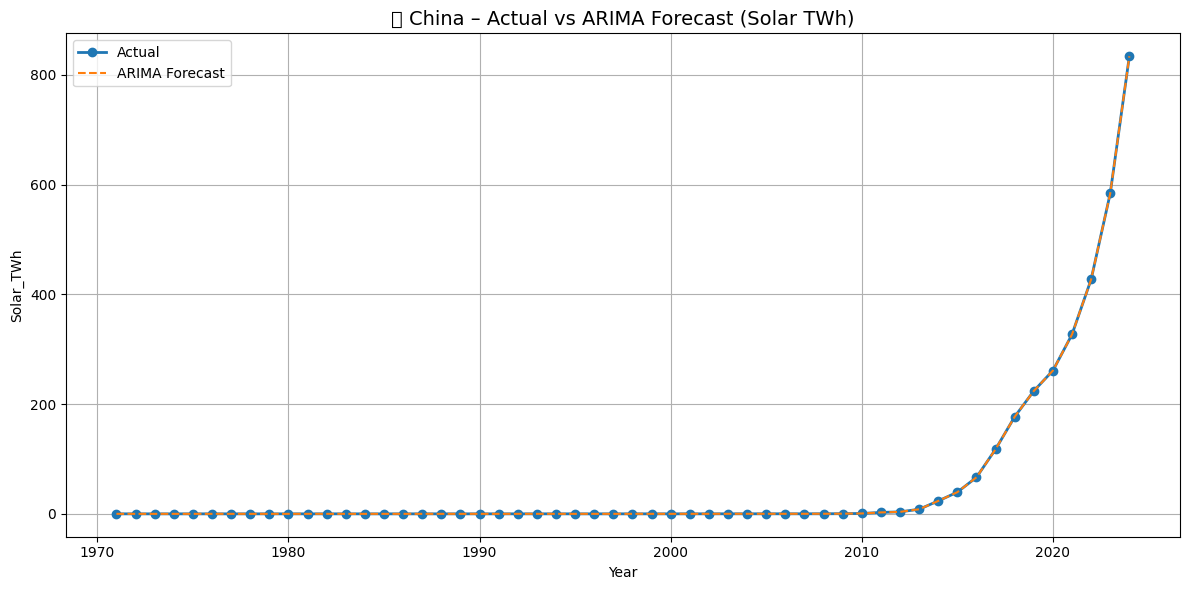

<ipython-input-21-19741d617c0a>:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


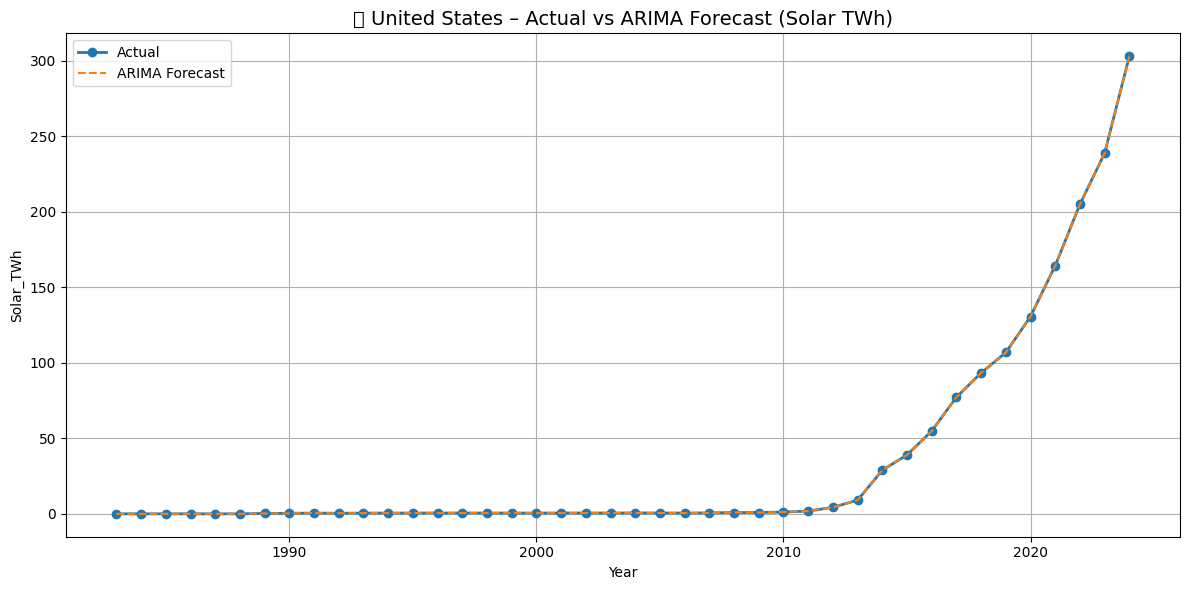

<ipython-input-21-19741d617c0a>:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


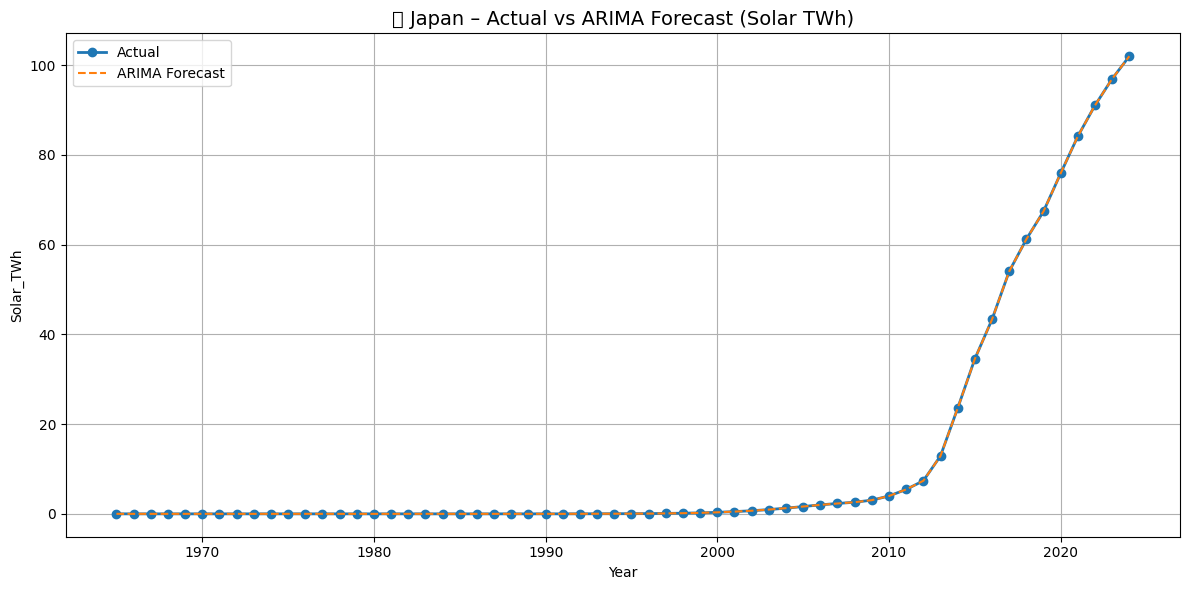

<ipython-input-21-19741d617c0a>:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


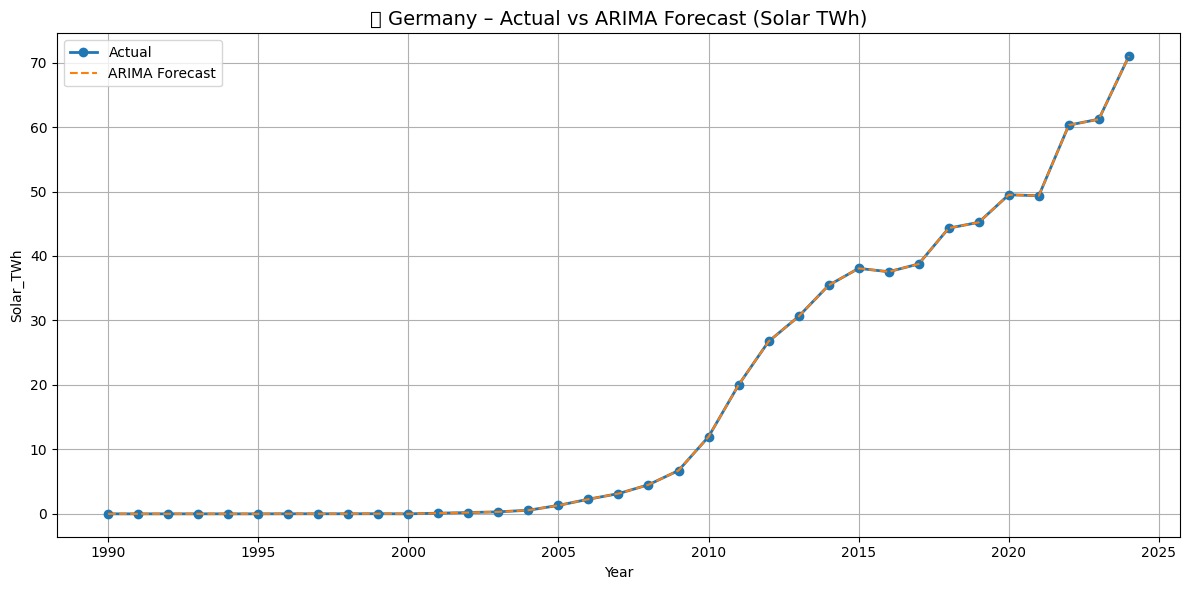

<ipython-input-21-19741d617c0a>:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


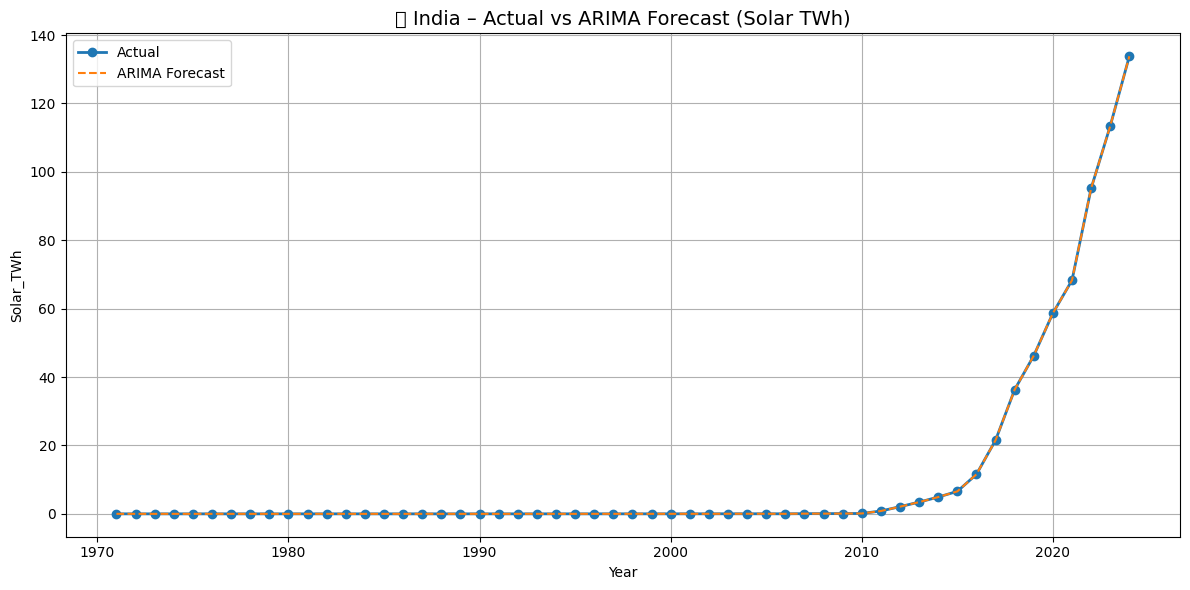

In [21]:
# ---------------- ARIMA Forecasting for Top 5 Countries ----------------

import pmdarima as pm
from sklearn.metrics import mean_squared_error
from math import sqrt

# Rename correct column if needed again (for safety)
df.rename(columns={'Electricity from solar - TWh': 'Solar_TWh'}, inplace=True)

# Top 5 countries (based on prior filtering)
top5_countries = ['China', 'United States', 'Japan', 'Germany', 'India']
arima_rmse_results = {}
arima_combined_forecast = pd.DataFrame()

def forecast_with_arima(df, country, periods=5):
    global arima_combined_forecast

    country_df = df[df['Entity'] == country][['Year', 'Solar_TWh']].dropna()
    ts = country_df.set_index('Year')['Solar_TWh']

    model = pm.auto_arima(ts, seasonal=False, suppress_warnings=True, stepwise=True)
    forecast_values = model.predict(n_periods=periods)
    forecast_index = list(range(ts.index.max() + 1, ts.index.max() + periods + 1))
    forecast_series = pd.Series(forecast_values, index=forecast_index)

    full_series = pd.concat([ts, forecast_series])
    full_df = full_series.reset_index()
    full_df.columns = ['Year', 'Solar_TWh']
    full_df['Country'] = country
    arima_combined_forecast = pd.concat([arima_combined_forecast, full_df])

    if len(ts) >= 6:
        train = ts[:-3]
        test = ts[-3:]
        model_cv = pm.auto_arima(train, seasonal=False, suppress_warnings=True)
        preds = model_cv.predict(n_periods=3)
        rmse = round(sqrt(mean_squared_error(test, preds)), 2)
        arima_rmse_results[country] = rmse
    else:
        arima_rmse_results[country] = None

# Run ARIMA forecast for each country
for country in top5_countries:
    forecast_with_arima(df, country, periods=5)

# Show RMSE
arima_rmse_df = pd.DataFrame.from_dict(arima_rmse_results, orient='index', columns=['ARIMA RMSE (TWh)'])
print("\n📊 ARIMA RMSE Comparison Table:")
print(arima_rmse_df)

# Plot actual vs forecast
def plot_arima_actual_vs_forecast(df, forecast_df, country):
    actual = df[df['Entity'] == country][['Year', 'Solar_TWh']].dropna()
    predicted = forecast_df[forecast_df['Country'] == country]

    plt.figure(figsize=(12, 6))
    plt.plot(actual['Year'], actual['Solar_TWh'], label='Actual', marker='o', linewidth=2)
    plt.plot(predicted['Year'], predicted['Solar_TWh'], label='ARIMA Forecast', linestyle='--')
    plt.title(f'📊 {country} – Actual vs ARIMA Forecast (Solar TWh)', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Solar_TWh')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for each country
for country in top5_countries:
    plot_arima_actual_vs_forecast(df, arima_combined_forecast, country)